In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_palette("deep")


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/employee_salary_dataset.csv")
df.head()


,EmployeeID,Name,Department,Experience_Years,Education_Level,Age,Gender,City,Monthly_Salary
0,1,Employee_1,Marketing,15,Master,53,Female,Delhi,111416
1,2,Employee_2,Operations,7,Bachelor,25,Female,Bangalore,95271
2,3,Employee_3,IT,12,High School,51,Female,Hyderabad,69064
3,4,Employee_4,Operations,8,PhD,44,Male,Delhi,95091
4,5,Employee_5,Operations,15,Master,36,Female,Delhi,132450


In [ ]:
df.info()
df.describe(include="all")
print("Valeurs manquantes :\n", df.isna().sum())
print("Doublons :", df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        50 non-null     int64 
 1   Name              50 non-null     object
 2   Department        50 non-null     object
 3   Experience_Years  50 non-null     int64 
 4   Education_Level   50 non-null     object
 5   Age               50 non-null     int64 
 6   Gender            50 non-null     object
 7   City              50 non-null     object
 8   Monthly_Salary    50 non-null     int64 
dtypes: int64(4), object(5)
memory usage: 3.6+ KB
Valeurs manquantes :
 EmployeeID          0
Name                0
Department          0
Experience_Years    0
Education_Level     0
Age                 0
Gender              0
City                0
Monthly_Salary      0
dtype: int64
Doublons : 0


,count
Gender,
Female,27
Male,23


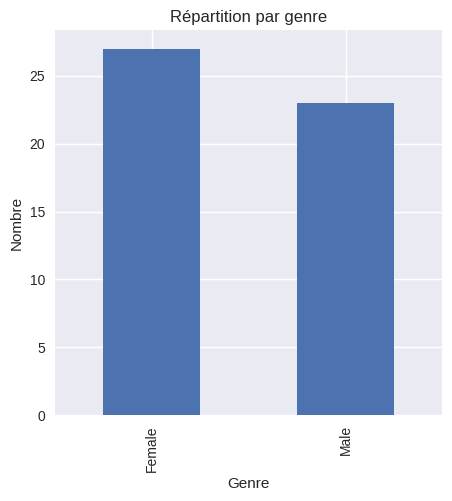

In [ ]:
gender_counts = df["Gender"].value_counts()
display(gender_counts)

plt.figure(figsize=(5,5))
gender_counts.plot(kind="bar")
plt.title("Répartition par genre")
plt.xlabel("Genre")
plt.ylabel("Nombre")
plt.show()


['Marketing' 'Operations' 'IT' 'Finance' 'HR']


,count
Department,
Marketing,13
Operations,10
IT,10
Finance,10
HR,7


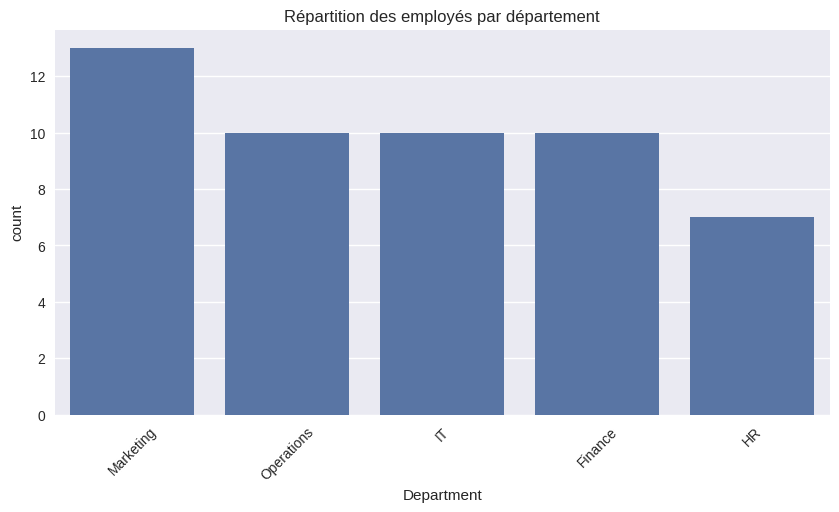

In [ ]:
print(df["Department"].unique())
dept_counts = df["Department"].value_counts()
display(dept_counts)

plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Department")
plt.xticks(rotation=45)
plt.title("Répartition des employés par département")
plt.show()


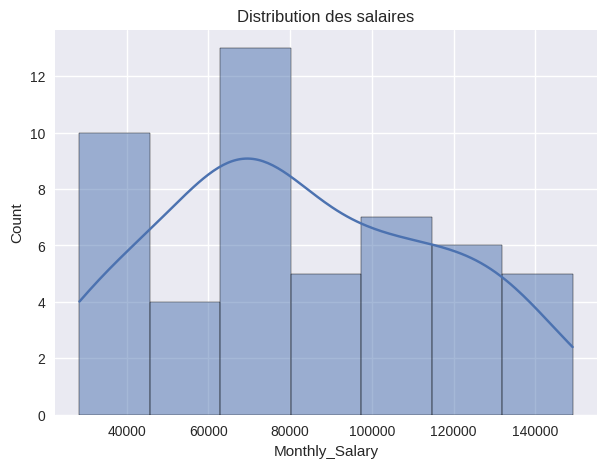

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(df["Monthly_Salary"], kde=True)
plt.title("Distribution des salaires")
plt.show()


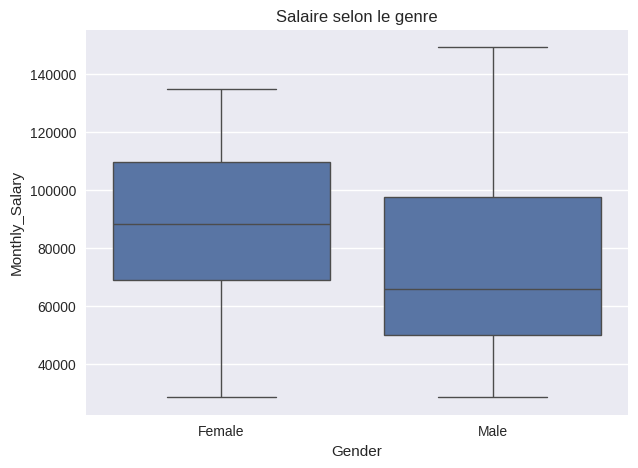

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="Gender", y="Monthly_Salary")
plt.title("Salaire selon le genre")
plt.show()


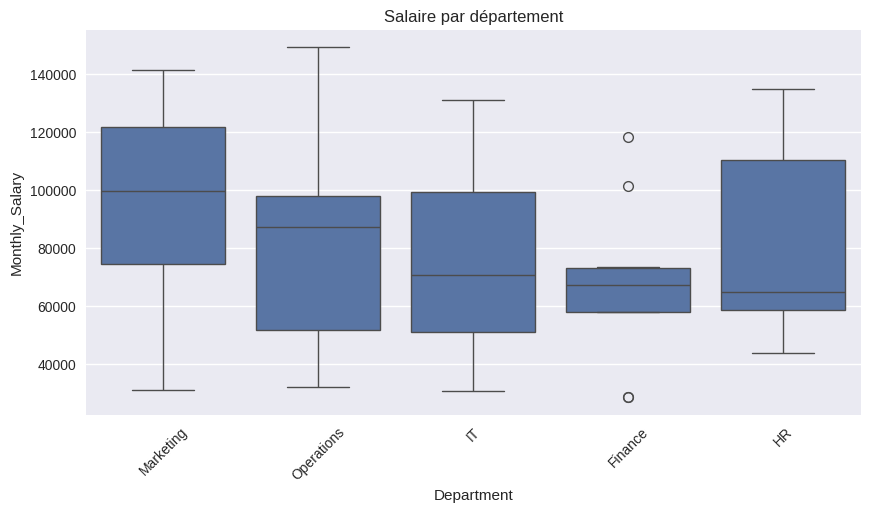

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="Department", y="Monthly_Salary")
plt.xticks(rotation=45)
plt.title("Salaire par département")
plt.show()


In [ ]:
Experience_Years = df.pivot_table(
    index="Experience_Years",
    values="Monthly_Salary",
    aggfunc=["max","mean","min"]
)
display(Experience_Years)


,max,mean,min
,Monthly_Salary,Monthly_Salary,Monthly_Salary
Experience_Years,,,
1,98744,62014.666667,43589
2,72333,64039.500000,55746
3,88208,70951.333333,58828
4,104909,80488.750000,42429
5,28420,28420.000000,28420
6,28436,28436.000000,28436
7,95271,88381.000000,81491
8,141381,109035.166667,57635


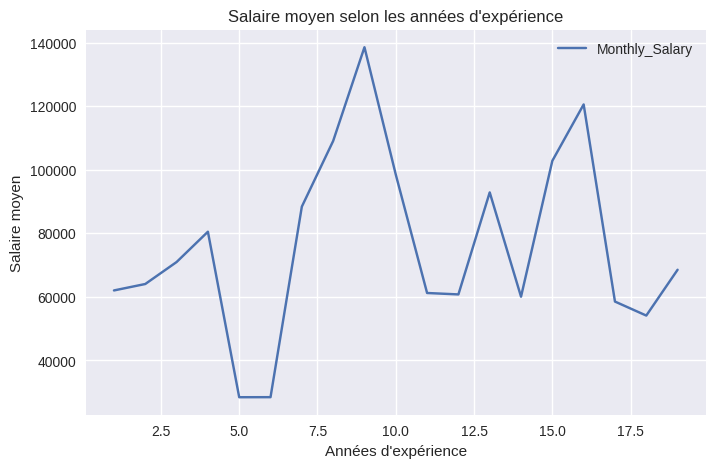

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(data=Experience_Years["mean"])
plt.title("Salaire moyen selon les années d'expérience")
plt.ylabel("Salaire moyen")
plt.xlabel("Années d'expérience")
plt.show()


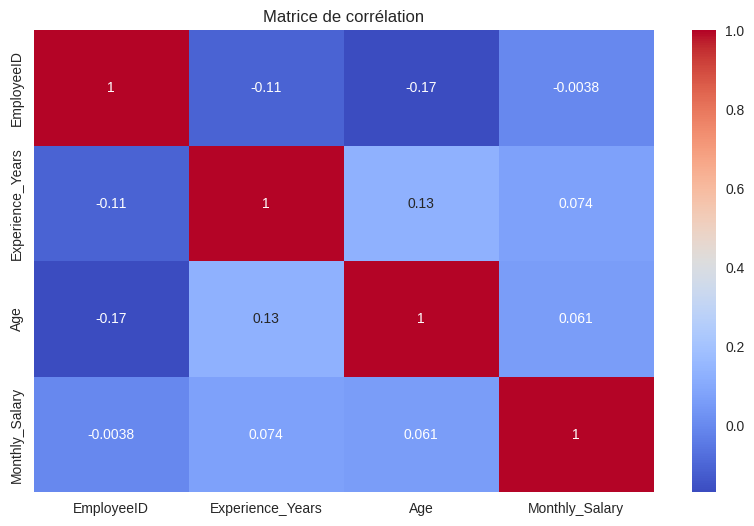

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

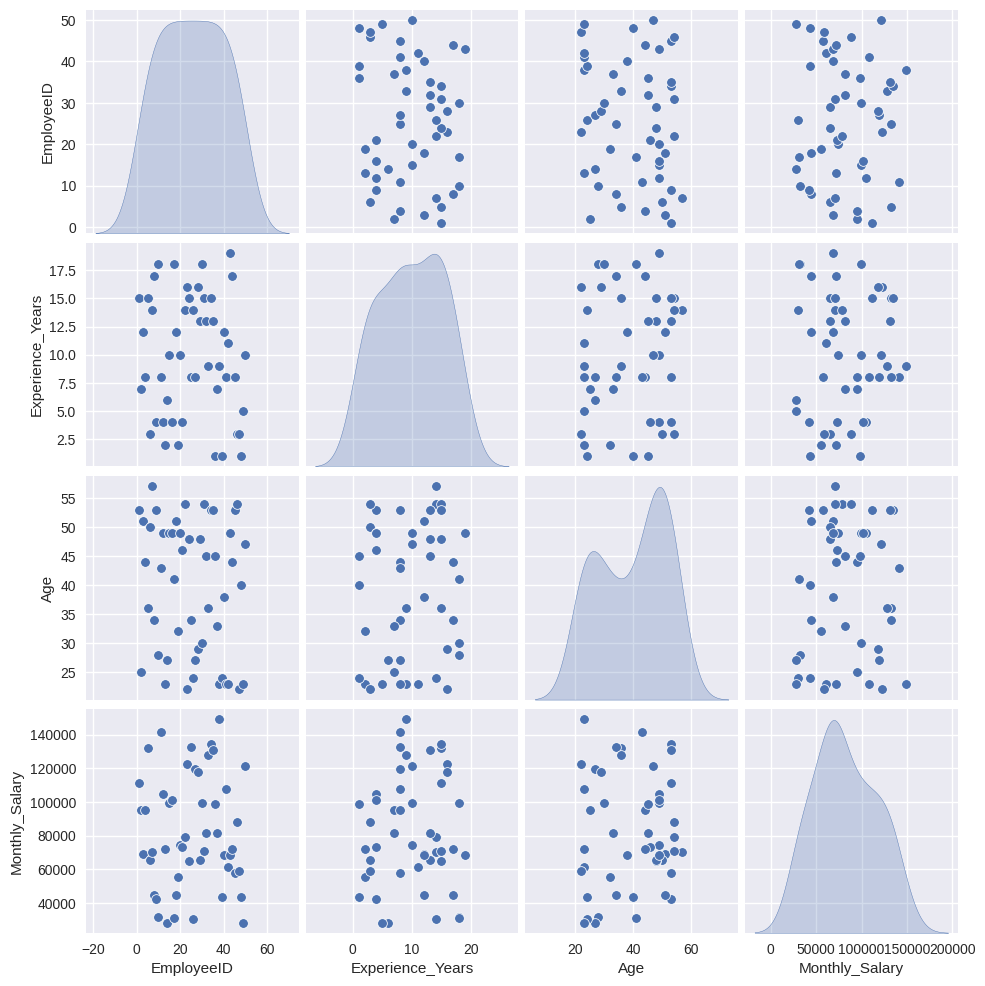

In [ ]:
sns.pairplot(df, diag_kind="kde")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
for col in df.select_dtypes(include="object"):
    df[col] = le.fit_transform(df[col])

X = df.drop("Monthly_Salary", axis=1)
y = df["Monthly_Salary"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Extra Trees": ExtraTreesRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "XGBoost": XGBRegressor(objective='reg:squarederror')
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)

    results.append([name, mse, r2])

results_df = pd.DataFrame(results, columns=["Model", "MSE", "R2 Score"])
display(results_df)


,Model,MSE,R2 Score
0,Linear Regression,1.343894e+09,-0.139818
1,Ridge,1.346359e+09,-0.141909
2,Lasso,1.343918e+09,-0.139839
3,KNN,1.498036e+09,-0.270553
4,Decision Tree,2.475415e+09,-1.099513
5,Random Forest,1.487259e+09,-0.261413
6,Extra Trees,1.360848e+09,-0.154198
7,Gradient Boosting,1.401706e+09,-0.188851
8,AdaBoost,1.399464e+09,-0.186950
9,XGBoost,1.183228e+09,-0.003550


In [ ]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')
    print(f"{name} → Mean R2: {scores.mean():.4f} | Std: {scores.std():.4f}")


Linear Regression → Mean R2: -1.1876 | Std: 1.0762
Ridge → Mean R2: -1.1626 | Std: 1.0437
Lasso → Mean R2: -1.1874 | Std: 1.0760
KNN → Mean R2: -0.6381 | Std: 0.6688
Decision Tree → Mean R2: -5.8932 | Std: 9.1542
Random Forest → Mean R2: -0.8850 | Std: 0.8261
Extra Trees → Mean R2: -1.1496 | Std: 0.8710
Gradient Boosting → Mean R2: -1.8773 | Std: 1.6985
AdaBoost → Mean R2: -1.5150 | Std: 1.3058
XGBoost → Mean R2: -1.5799 | Std: 1.9282


In [ ]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

y_bins = pd.qcut(y, q=5, labels=False)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for name, model in models.items():
    scores = []
    for train_idx, test_idx in skf.split(X, y_bins):
        model.fit(X.iloc[train_idx], y.iloc[train_idx])
        pred = model.predict(X.iloc[test_idx])
        scores.append(r2_score(y.iloc[test_idx], pred))
    print(f"{name} → Stratified Mean R2: {np.mean(scores):.4f}")


Linear Regression → Stratified Mean R2: -0.3822
Ridge → Stratified Mean R2: -0.3597
Lasso → Stratified Mean R2: -0.3822
KNN → Stratified Mean R2: -0.1307
Decision Tree → Stratified Mean R2: -0.7863
Random Forest → Stratified Mean R2: -0.1654
Extra Trees → Stratified Mean R2: -0.2834
Gradient Boosting → Stratified Mean R2: -0.4292
AdaBoost → Stratified Mean R2: -0.2763
XGBoost → Stratified Mean R2: -0.4753
